<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/CNN/Quest_CNN_Classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
from keras.layers import MaxPooling2D, Conv2D,Flatten,Dense
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In this quest, you will work with the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). It contains 60000 32x32 colour images in 10 classes, with 6000 images per class. Your task will be predicting image classes.


# Tasks

Normalize pixel values of both train and test images to the values in the range between 0 and 1

In [27]:
# your code
import numpy as np
np.max(train_images[0])
train_images=train_images/255
test_images=test_images/255

[9]


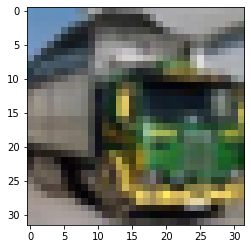

In [29]:
print(train_labels[14])
plt.imshow(train_images[14]);


In [8]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [38]:
from keras.utils.np_utils import to_categorical   

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [39]:
train_labels.shape

(50000, 10)

Build a sequential model with the following architecture:

conv2d - (None, 30, 30, 32)  
_________________________________________________________________
max_pooling2d - (None, 15, 15, 32)        
_________________________________________________________________
conv2d - (None, 13, 13, 64)
_________________________________________________________________
max_pooling2d - (None, 6, 6, 64)        
_________________________________________________________________
conv2d - (None, 4, 4, 128) 
_________________________________________________________________
flatten - (None, 2048)       
_________________________________________________________________
dense - (None, 64)    
_________________________________________________________________
dense - (None, 10)       


In [36]:
# your code
def cnnmodel(input_shape):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(input_shape[1], input_shape[2], input_shape[3])))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.build()
  model.summary()
  return model


Compile the model using Adam optimizer, sparse categorical crossentropy as loss function, and choose an appropriate metric for classification. Use 10 epochs to train the model.

In [ ]:
# your code
cnnmod = cnnmodel(train_images.shape)
# compile model
cnnmod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnnmod.fit(train_images,train_labels)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Evaluate the model on test data to get the loss and accuracy metrics

In [16]:
# your code
# evaluate model
_, acc = cnnmod.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


NameError: ignored